
# <center> **Liver Disease Prediction using Machine Learning** </center>

<center><img src="https://www.lalpathlabs.com/blog/wp-content/uploads/2020/01/Liver-Diseases.jpg" Height='500' Width='500'></center><br>


#### **Liver Disase Dataset**
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# **Importing Packages**

In [2]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

# **Uploading Dataset**

In [4]:
# Reading Dataset:
dataset = pd.read_csv("liver_1.csv")
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# Last 5 records:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
819,21,Male,0.6,0.2,356,45,26,6.4,3.3,1.00,2
820,17,Male,1.5,0.3,335,45,19,7.4,4.1,1.20,2
821,48,Female,1.6,0.2,346,23,28,5.2,2.5,0.90,2
822,38,Male,1.7,0.2,367,46,92,7.4,4.3,1.38,2
823,4,Male,1.4,0.2,367,67,34,8.0,4.0,1.00,2


# **Data Preprocessing**

In [6]:
# Shape of dataset:
dataset.shape

(824, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         824 non-null    int64  
 1   Gender                      824 non-null    object 
 2   Total_Bilirubin             824 non-null    float64
 3   Direct_Bilirubin            824 non-null    float64
 4   Alkaline_Phosphotase        824 non-null    int64  
 5   Alamine_Aminotransferase    824 non-null    int64  
 6   Aspartate_Aminotransferase  824 non-null    int64  
 7   Total_Protiens              824 non-null    float64
 8   Albumin                     824 non-null    float64
 9   Albumin_and_Globulin_Ratio  819 non-null    float64
 10  Dataset                     824 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 70.9+ KB


## **Checking Missing Values**

In [8]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

- 'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [9]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(dataset['Albumin_and_Globulin_Ratio'].median())
print(dataset['Albumin_and_Globulin_Ratio'].mean())

1.0
0.9712698412698413


In [10]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [11]:
# Datatypes:
dataset.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

## **Description about Dataset**

In [12]:
# Description:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,43.976942,3.099624,1.286068,310.265777,78.684466,112.804612,6.468944,3.191553,0.971444,1.366505
std,16.623943,5.618101,2.451181,245.993670,181.643590,325.393318,1.094235,0.838612,0.316760,0.482142
min,4.000000,0.300000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.100000,1.000000
25%,32.000000,0.800000,0.200000,182.000000,25.000000,25.000000,5.700000,2.600000,0.800000,1.000000
50%,45.000000,1.100000,0.300000,232.000000,36.000000,40.000000,6.500000,3.200000,1.000000,1.000000
75%,58.000000,2.400000,1.100000,345.250000,58.000000,86.000000,7.200000,3.800000,1.160000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,8.300000,2.860000,2.000000


In [13]:
dataset["Dataset"].value_counts()

Dataset
1    522
2    302
Name: count, dtype: int64

In [14]:
resampled_1=dataset[dataset["Dataset"]==1].head(400)
resampled_1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.40,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.40,1
562,66,Male,17.3,8.5,388,173,367,7.8,2.6,0.50,1
563,64,Male,1.5,0.5,298,31,83,7.4,2.6,0.50,1


In [15]:
resampled_2=dataset[dataset["Dataset"]==2].head(302)
resampled_2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
...,...,...,...,...,...,...,...,...,...,...,...
819,21,Male,0.6,0.2,356,45,26,6.4,3.3,1.00,2
820,17,Male,1.5,0.3,335,45,19,7.4,4.1,1.20,2
821,48,Female,1.6,0.2,346,23,28,5.2,2.5,0.90,2
822,38,Male,1.7,0.2,367,46,92,7.4,4.3,1.38,2


In [16]:
new_df = pd.concat([resampled_1,resampled_2],ignore_index=True)
new_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
697,21,Male,0.6,0.2,356,45,26,6.4,3.3,1.00,2
698,17,Male,1.5,0.3,335,45,19,7.4,4.1,1.20,2
699,48,Female,1.6,0.2,346,23,28,5.2,2.5,0.90,2
700,38,Male,1.7,0.2,367,46,92,7.4,4.3,1.38,2


# **Exploratory Data Analysis**

Liver Disease Patients      : 400
Non Liver Disease Patients  : 302


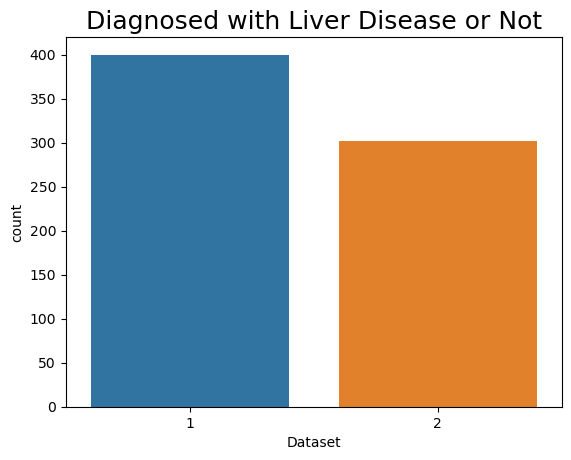

In [17]:
# Target feature:
print("Liver Disease Patients      :", new_df['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", new_df['Dataset'].value_counts()[2])

# Visualization:
ax = sns.countplot(data = new_df, x ='Dataset')
ax.set_title('Diagnosed with Liver Disease or Not', fontsize=18)
plt.show()

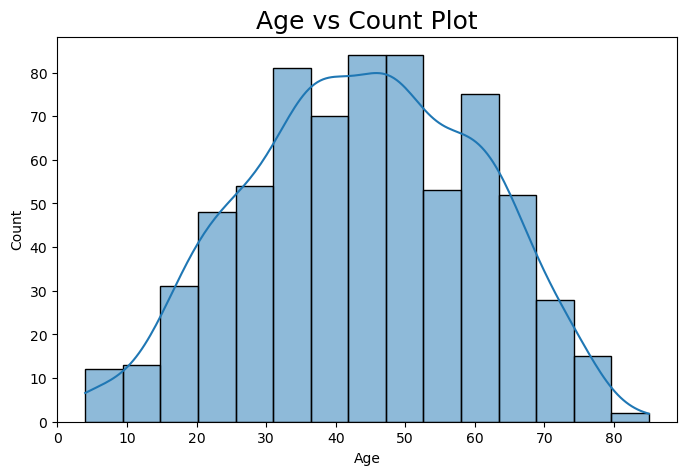

In [18]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(new_df['Age'], kde=True)
plt.title('Age vs Count Plot', fontsize=18)
plt.show()

In [19]:
new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Total Male   : 524
Total Female   : 178


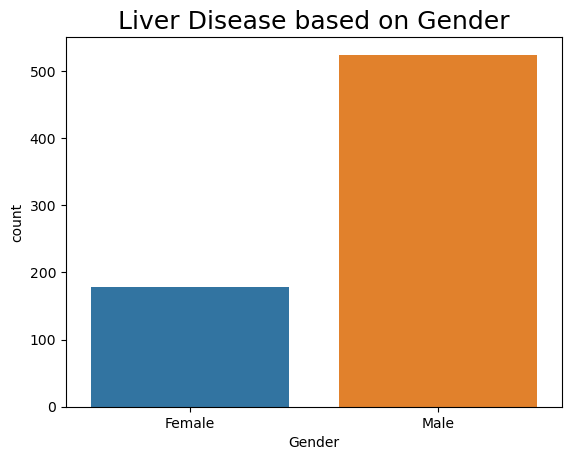

In [20]:
# Gender feature:
print("Total Male   :", new_df['Gender'].value_counts()[0])
print("Total Female   :", new_df['Gender'].value_counts()[1])

# Visualization:
ax = sns.countplot(data = new_df, x ='Gender')
ax.set_title('Liver Disease based on Gender', fontsize=18)
plt.show()

In [21]:
# Printing How many Unique values present in each feature:
for feature in new_df.columns:
    print(feature,":", len(new_df[feature].unique()))

Age : 71
Gender : 2
Total_Bilirubin : 117
Direct_Bilirubin : 82
Alkaline_Phosphotase : 291
Alamine_Aminotransferase : 150
Aspartate_Aminotransferase : 174
Total_Protiens : 66
Albumin : 47
Albumin_and_Globulin_Ratio : 72
Dataset : 2


# **Feature Extraction**

In [22]:
# Label Encoding
new_df['Gender'] = np.where(new_df['Gender']=='Male', 1,0)

In [23]:
new_df.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1
9,57,1,0.6,0.1,210,51,59,5.9,2.7,0.80,1


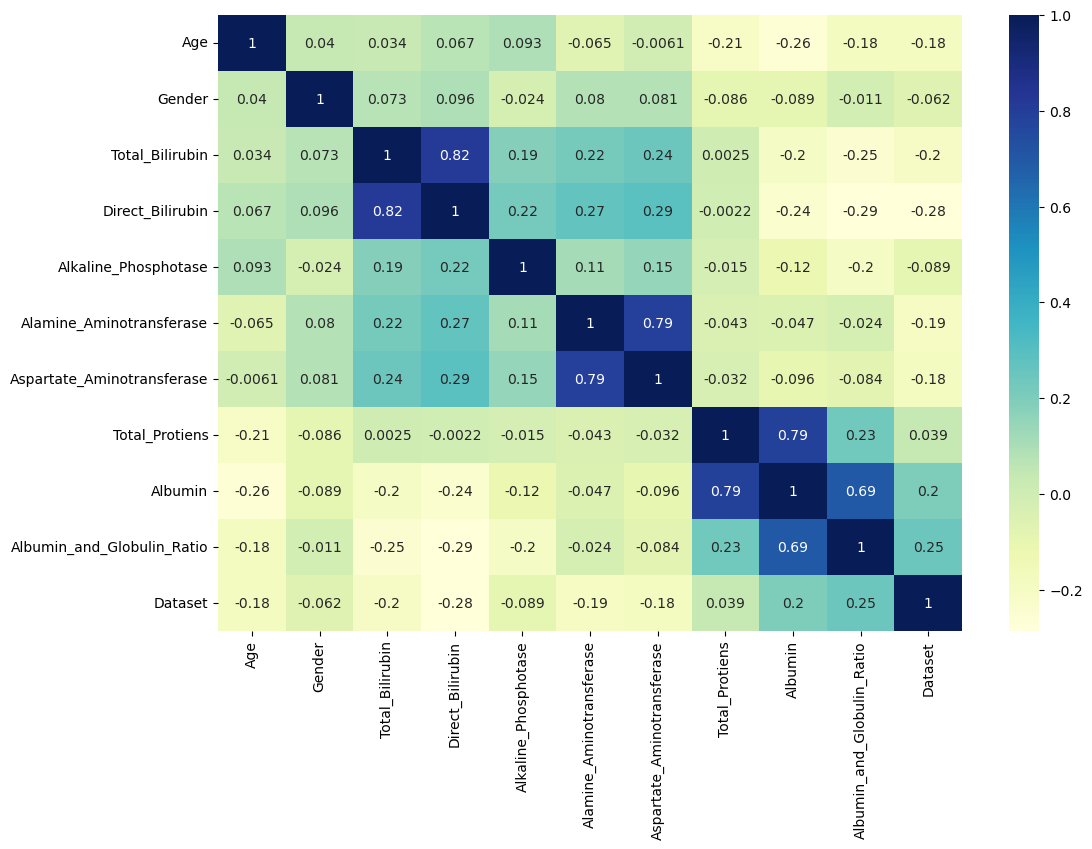

In [24]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [25]:
new_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

1. Multicollinearity betwwen **'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**
2. Multicollinearity betwwen **'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**
3. Multicollinearity betwwen **'Total_Protiens'** and **'Albumin'** is **0.78%**
4. Multicollinearity betwwen **'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [26]:
# Droping 'Direct_Bilirubin' feature:
new_df = new_df.drop('Direct_Bilirubin', axis=1)

In [27]:
new_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: xlabel='Albumin', ylabel='Density'>

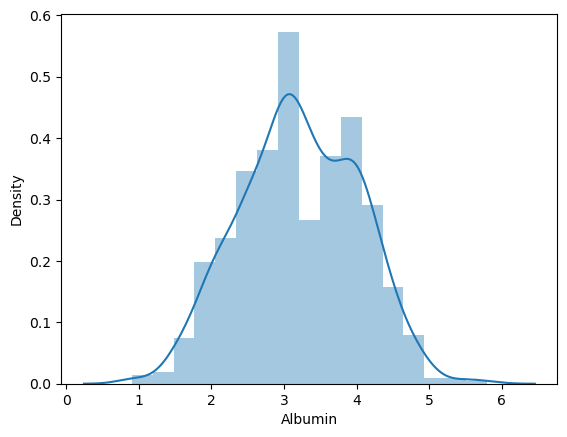

In [28]:
sns.distplot(new_df['Albumin'])

In [29]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=new_df['Total_Protiens'].mean() + 3* new_df['Total_Protiens'].std()
lower_boundary=new_df['Total_Protiens'].mean() - 3* new_df['Total_Protiens'].std()

print(new_df['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.502749287749288
3.20407351815436
9.801425057344217


In [30]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=new_df['Albumin'].mean() + 3* new_df['Albumin'].std()
lower_boundary=new_df['Albumin'].mean() - 3* new_df['Albumin'].std()

print(new_df['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.212122507122507
0.7709214051006312
5.653323609144383


In [31]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = new_df.Total_Bilirubin.quantile(0.75)-new_df.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = new_df['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = new_df['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
new_df.loc[new_df['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-3.4000000000000004
6.4


In [32]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = new_df.Alkaline_Phosphotase.quantile(0.75) - new_df.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = new_df['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = new_df['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
new_df.loc[new_df['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-282.0
796.0


In [33]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = new_df.Alamine_Aminotransferase.quantile(0.75) - new_df.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = new_df['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = new_df['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
new_df.loc[dataset['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-72.0
152.0


In [34]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = new_df.Aspartate_Aminotransferase.quantile(0.75) - new_df.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = new_df['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = new_df['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
new_df.loc[new_df['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-129.0
228.0


In [35]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = new_df.Albumin_and_Globulin_Ratio.quantile(0.75) - new_df.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = new_df['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = new_df['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
new_df.loc[new_df['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.2799999999999996
2.2399999999999993


In [36]:
# Top 5 records:
new_df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,18,6.8,3.3,0.90,1
1,62,1,6.4,699,64,100,7.5,3.2,0.74,1
2,62,1,6.4,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195,27,59,7.3,2.4,0.40,1


In [37]:
# Description after deal with outliers by IQR:
new_df.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,43.874644,0.746439,1.950413,284.363248,80.434473,64.202279,6.502749,3.212123,0.974046,1.430199
std,16.487966,0.435360,1.844511,165.122962,158.833446,62.014554,1.099559,0.813734,0.306404,0.495457
min,4.000000,0.000000,0.300000,63.000000,10.000000,10.000000,2.700000,0.900000,0.100000,1.000000
25%,32.000000,0.000000,0.800000,180.000000,25.000000,24.000000,5.800000,2.600000,0.800000,1.000000
50%,45.000000,1.000000,1.000000,217.000000,37.000000,38.000000,6.600000,3.200000,1.000000,1.000000
75%,57.000000,1.000000,2.200000,334.000000,74.000000,75.000000,7.200000,3.900000,1.160000,2.000000
max,85.000000,1.000000,6.400000,796.000000,2000.000000,228.000000,9.600000,5.800000,2.240000,2.000000


In [38]:
# Independent and Dependent Feature:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [39]:
# top 5 records of Independent features:
X.head(20)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187,16,18,6.8,3.3,0.90
1,62,1,6.4,699,64,100,7.5,3.2,0.74
2,62,1,6.4,490,60,68,7.0,3.3,0.89
3,58,1,1.0,182,14,20,6.8,3.4,1.00
4,72,1,3.9,195,27,59,7.3,2.4,0.40
5,46,1,1.8,208,19,14,7.6,4.4,1.30
6,26,0,0.9,154,16,12,7.0,3.5,1.00
7,29,0,0.9,202,14,11,6.7,3.6,1.10
8,55,1,0.7,290,53,58,6.8,3.4,1.00
9,57,1,0.6,210,51,59,5.9,2.7,0.80


In [40]:
# top 5 records of dependent features:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [41]:
y.value_counts()

Dataset
1    400
2    302
Name: count, dtype: int64

In [42]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [43]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 400, 2: 302})
After SMOTE  :  Counter({1: 356, 2: 356})


# **Building the Machine Learning Model**

## **Splitting the Dataset**

In [44]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [45]:
print(X_train.shape)
print(X_test.shape)

(498, 9)
(214, 9)


In [46]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
4,Alamine_Aminotransferase,6520.703361
5,Aspartate_Aminotransferase,4285.820680
3,Alkaline_Phosphotase,478.469500
0,Age,147.182162
2,Total_Bilirubin,85.485455
7,Albumin,5.820164
8,Albumin_and_Globulin_Ratio,4.262176
1,Gender,0.691501
6,Total_Protiens,0.202678


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

## **1. Random Forest Classifier**

In [47]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(max_leaf_nodes=30,n_estimators=30,random_state=112)
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7616822429906542
[[75 32]
 [19 88]]
              precision    recall  f1-score   support

           1       0.80      0.70      0.75       107
           2       0.73      0.82      0.78       107

    accuracy                           0.76       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.76      0.76       214



### **2. ADA Boost Classifier**

In [49]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7429906542056075
[[79 28]
 [27 80]]
              precision    recall  f1-score   support

           1       0.75      0.74      0.74       107
           2       0.74      0.75      0.74       107

    accuracy                           0.74       214
   macro avg       0.74      0.74      0.74       214
weighted avg       0.74      0.74      0.74       214



## **3. Support Vector Machine (SVM)**

In [50]:
from sklearn.svm import SVC
from sklearn import metrics as met
svc = SVC(random_state=42)

In [51]:
svc.fit(X_train,y_train)

SVC(random_state=42)

In [52]:
svc_preds = svc.predict(X_test)  # Predicting the model

# Performance:
print('Accuracy:', accuracy_score(y_test,svc_preds))
print(confusion_matrix(y_test,svc_preds))
print(classification_report(y_test,svc_preds))

Accuracy: 0.6214953271028038
[[42 65]
 [16 91]]
              precision    recall  f1-score   support

           1       0.72      0.39      0.51       107
           2       0.58      0.85      0.69       107

    accuracy                           0.62       214
   macro avg       0.65      0.62      0.60       214
weighted avg       0.65      0.62      0.60       214



## **4. Neive Bayes Classifier (NB)**

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
gnb_preds = gnb.predict(X_test)
# Performance:
print('Accuracy:', accuracy_score(y_test,gnb_preds))
print(confusion_matrix(y_test,gnb_preds))
print(classification_report(y_test,gnb_preds))

Accuracy: 0.6635514018691588
[[53 54]
 [18 89]]
              precision    recall  f1-score   support

           1       0.75      0.50      0.60       107
           2       0.62      0.83      0.71       107

    accuracy                           0.66       214
   macro avg       0.68      0.66      0.65       214
weighted avg       0.68      0.66      0.65       214



## 5. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [56]:
lr_preds = lr.predict(X_test)
# Performance:
print('Accuracy:', accuracy_score(y_test,lr_preds))
print(confusion_matrix(y_test,lr_preds))
print(classification_report(y_test,lr_preds))

Accuracy: 0.7009345794392523
[[70 37]
 [27 80]]
              precision    recall  f1-score   support

           1       0.72      0.65      0.69       107
           2       0.68      0.75      0.71       107

    accuracy                           0.70       214
   macro avg       0.70      0.70      0.70       214
weighted avg       0.70      0.70      0.70       214



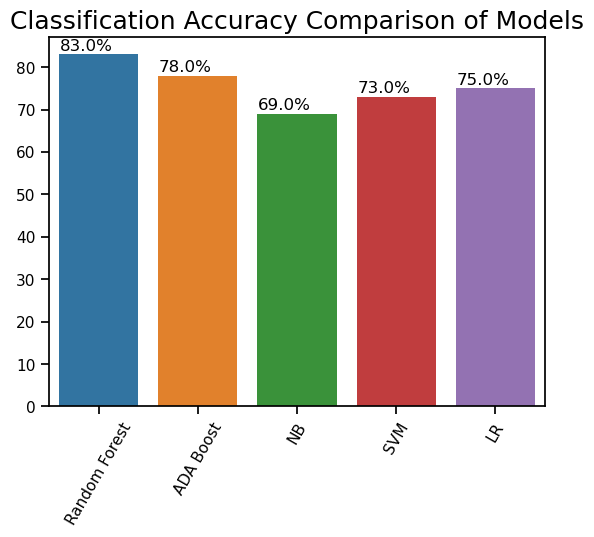

In [57]:
sns.set(context='notebook', style=None, palette='tab10')
models = ['Random Forest','ADA Boost','NB','SVM',"LR"]
scores = [83, 78, 69, 73,75]
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(60)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

# **Prediction  of the Model**

##**Prediction_1**

In [58]:
X_test.head(30)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
624,45,1,1.000073,151,14,16,6.700318,3.400147,1.000000
506,49,1,0.800000,148,14,12,5.400000,2.830000,1.000000
249,41,1,6.400000,149,94,92,6.300000,3.100000,0.900000
310,55,1,3.600000,349,40,70,7.200000,2.900000,0.600000
676,16,1,0.782282,595,26,28,7.035465,4.022529,1.303198
94,45,0,3.500000,189,63,87,5.600000,2.900000,1.000000
22,52,1,0.900000,156,35,44,4.900000,2.900000,1.400000
335,60,1,6.400000,466,46,52,6.100000,2.000000,0.450000
710,62,0,3.860831,640,41,24,6.561050,2.838950,0.783370
695,27,0,1.193074,178,62,39,6.087534,3.288919,1.097230


In [59]:
y_test.head(30)

624    2
506    2
249    1
310    1
676    2
94     1
22     1
335    1
710    2
695    2
673    2
31     1
692    2
590    2
633    2
556    2
610    2
384    2
8      1
256    1
347    1
656    2
480    2
291    1
626    2
645    2
271    1
118    1
177    1
64     1
Name: Dataset, dtype: int64

In [60]:
input_data = (39,1,1.900000,180.000000,42.000000,62,7.400000,4.300000,1.380000)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = RandomForest.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
    print('The Person Having Liver Disease')
else:
    print('The Person does not have a Liver Disease')

[2]
The Person does not have a Liver Disease


##**Prediction_2**

In [61]:
input_data = (29,1,0.800000,156.000000,12.000000,15,6.800000,3.700000,1.100000)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = RandomForest.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
    print('The Person Having Liver Disease')
else:
    print('The Person does not have a Liver Disease')

[2]
The Person does not have a Liver Disease


In [62]:
import pickle

In [63]:
filename='liver_model.pkl'
pickle.dump(RandomForest,open(filename,'wb'))

In [64]:
liver_model=pickle.load(open("liver_model.pkl",'rb'))

In [65]:
input_data = (17,1,0.9,202.0,22,19,7.4,4.1,1.20)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = liver_model.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
    print('The Person Having Liver Disease')
else:
    print('The Person does not have a Liver Disease')

[2]
The Person does not have a Liver Disease
